# Excursion 1: The partial autocorrelation

## Recall: ARIMA model

**ARIMA** (auto-regressive integrated moving-average) models (using [`statsmodels.tsa.arima.model.ARIMA`](https://www.statsmodels.org/stable/generated/statsmodels.tsa.arima.model.ARIMA.html)) use the following workflow:

1. Differencing (d), which applies differencing to the original series $Y_t$, to remove the trend from the data
$X_t = Y_t - Y_{t-1}$ or second order $X_t = (Y_t - Y_{t-1}) - (Y_{t-1} - Y_{t-2})$ where d specifies the order of the differencing.

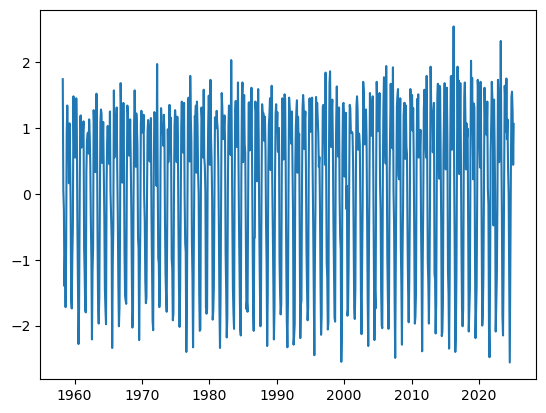

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

co2 = pd.read_csv('../co2_mm_mlo.csv', skiprows=40)
co2.index = pd.to_datetime(co2[['year', 'month']].assign(day=1))
co2 = co2['average'].astype(float).dropna()

co2_diff = co2.diff().dropna()

plt.plot(co2_diff.index, co2_diff)

2. ARMA on the differenced series, e.g. ARMA(2,1): $X_t = \mu + \phi_1 X_{t-1} + \phi_2 X_{t-2}  + \epsilon_t + \theta_1 (X_{t-1}-X'_{t-1})$

In [15]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(co2_diff, order=(12, 0, 4))
result = model.fit()

/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


3. Substitute back into original scale $X_t = Y_t - Y_{t-1}$ and $X_{t-1} = Y_{t-1} - Y_{t-2}$. Here for first order differencing (d=1), first order AR (p=1), and first order MA (q=1), resulting in $Y_t - Y_{t-1} = \mu + \phi_1 (Y_{t-1} - Y_{t-2}) + \epsilon_t + \theta_1 \epsilon_{t-1}$ and thus $Y_t = \mu + (1 + \phi_1) Y_{t-1} - \phi_1 Y_{t-2} + \epsilon_t + \theta_1 \epsilon_{t-1}$

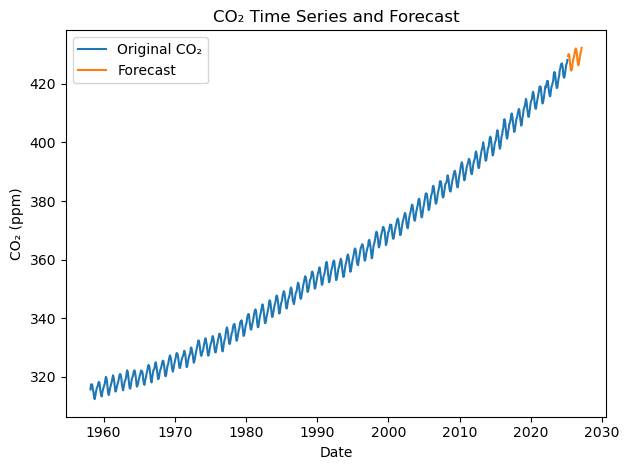

In [13]:
n_forecast = 24 
forecast_diff = result.forecast(steps=n_forecast)

last_actual = co2.iloc[-1]
forecast = forecast_diff.cumsum() + last_actual

forecast_index = pd.date_range(start=co2.index[-1] + pd.offsets.MonthBegin(1), periods=n_forecast, freq='MS')
forecast_series = pd.Series(forecast.values, index=forecast_index)

plt.plot(co2, label='Original CO₂')
plt.plot(forecast_series, label='Forecast')
plt.title('CO₂ Time Series and Forecast')
plt.xlabel('Date')
plt.ylabel('CO₂ (ppm)')
plt.legend()
plt.tight_layout()
plt.show()

**How to choose the order of AR, I and MA processes?**

## The ACF and PACF (partial autocorrelation function)

To identify the order $p$ of the AR model we can orientate us with the *partial autocorrelation function (PACF)*. 

It removes a difficulty of the ACF: Let’s say you're interested in the correlation between $x_t$ and $x_{t-2}$. The *ACF at lag 2* measures: $\rho_2 = \text{Corr}(x_t, x_{t-2})$ Now, suppose there’s a strong relationship between $x_t$ and $x_{t-1}$, and also between $x_{t-1}$ and $x_{t-2}$. Even *if there is no direct relationship between $x_t$ and $x_{t-2}$*, the ACF might still report a high value for $\rho_2$ — simply because: $ x_t \longleftarrow x_{t-1} \longleftarrow x_{t-2} $


That’s an *indirect correlation*: lag-2 seems correlated with the present *because of a chain through lag-1*. The **partial autocorrelation** at lag 2, $\phi_{22}$, removes the influence of the intermediate lag: $\phi_{22} = \text{Corr}(x_t, x_{t-2} \mid x_{t-1}) $, which tells you the *net contribution** of $x_{t-2}$ to explaining $x_t$, *after controlling for* $x_{t-1}$. 

*Analogy*: Think of ACF like asking, "Does grandparent influence grandchild?" — the answer might be “yes,” but mostly because of the *parent in between*. PACF asks: "Does grandparent influence grandchild *even when we account for the parent*?"

The **PACF at lag $k$** is the *last coefficient* in an *ordinary least squares (OLS) regression* of the form:
$ x_t = \beta_1 x_{t-1} + \beta_2 x_{t-2} + \cdots + \beta_k x_{t-k} + \epsilon_t $, i.e. $\phi_{kk} = \beta_k$. 
That is: the coefficient of $x_{t-k}$ after removing the effects of all intermediate lags $x_{t-1}, x_{t-2}, \ldots, x_{t-k+1}$. And now it makes sense, as this coefficient is then basically the last term which is included in the AR part of the ARMA model.

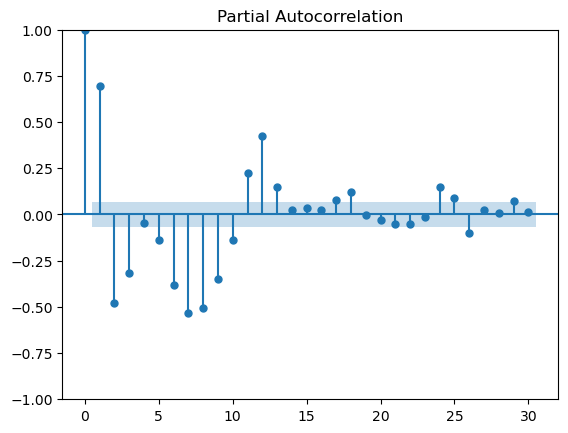

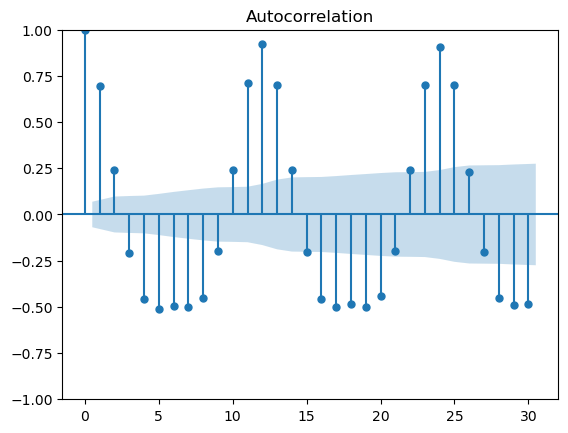

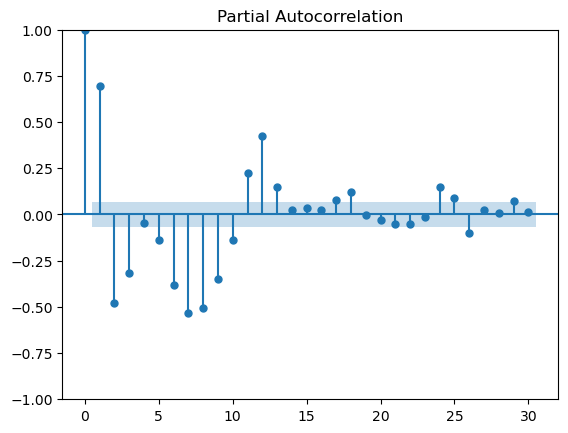

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(co2_diff)
plot_pacf(co2_diff)

# Discussion of Assignment 5

In [ ]:
import numpy as np

ex_1a = []
ex_1b = []
ex_1c = []
ex_1d = []

print(np.random.choice(ex_1f))

# Exercise: How to approach an unknown dataset?

Let's have a look at the following data set:

`./smeardata_aerosol_20250516.csv`

`./smeardata_meteorology_20250516.csv`

`./smeardata_radiation_20250516.csv`

`./smeardata_tracegases_20250516.csv`

What would be your approach for investigating this dataset?

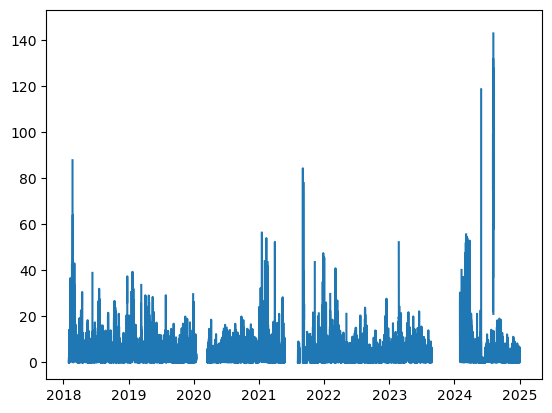

,KUM_META.hmp155_t,KUM_META.hmp155_rh,KUM_META.Tower_GLOB_32m,KUM_META.PM10_TEOM,KUM_META.BC_MAAP,KUM_META.cn,KUM_META.PM25_TEOM,KUM_META.NO_x,KUM_META.O_3,KUM_META.SO_2,KUM_META.NO,KUM_META.CO
KUM_META.hmp155_t,1.000000,-0.140093,0.284558,0.277686,0.020477,-0.122348,0.149341,-0.159151,0.077041,0.022948,-0.073071,-0.107045
KUM_META.hmp155_rh,-0.140093,1.000000,-0.379046,-0.107560,0.161722,-0.030477,0.071795,0.113657,-0.520069,0.002507,0.019011,0.182232
KUM_META.Tower_GLOB_32m,0.284558,-0.379046,1.000000,0.049946,-0.045199,0.124586,-0.015142,-0.041752,0.364239,0.119864,0.020522,-0.234161
KUM_META.PM10_TEOM,0.277686,-0.107560,0.049946,1.000000,0.122594,0.114294,0.698060,0.104234,0.024528,0.030805,0.067205,0.094116
KUM_META.BC_MAAP,0.020477,0.161722,-0.045199,0.122594,1.000000,0.367725,0.318448,0.430988,-0.199451,0.081456,0.396739,0.445095
KUM_META.cn,-0.122348,-0.030477,0.124586,0.114294,0.367725,1.000000,0.189423,0.643279,-0.250046,0.193795,0.514295,0.363302
KUM_META.PM25_TEOM,0.149341,0.071795,-0.015142,0.698060,0.318448,0.189423,1.000000,0.261932,-0.069703,0.038072,0.178067,0.268500
KUM_META.NO_x,-0.159151,0.113657,-0.041752,0.104234,0.430988,0.643279,0.261932,1.000000,-0.413235,0.129581,0.914820,0.544821
KUM_META.O_3,0.077041,-0.520069,0.364239,0.024528,-0.199451,-0.250046,-0.069703,-0.413235,1.000000,0.006562,-0.263419,-0.348626
KUM_META.SO_2,0.022948,0.002507,0.119864,0.030805,0.081456,0.193795,0.038072,0.129581,0.006562,1.000000,0.095620,0.150774


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

met = pd.read_csv('../smeardata_meteorology_20250516.csv', na_values='NaN')
rad = pd.read_csv('../smeardata_radiation_20250516.csv', na_values='NaN')
aer = pd.read_csv('../smeardata_aerosol_20250516.csv', na_values='NaN')
gas = pd.read_csv('../smeardata_tracegases_20250516.csv', na_values='NaN')

df = pd.concat([met, rad.iloc[:, 6:], aer.iloc[:, 6:], gas.iloc[:, 6:]], axis=1)
df['time'] = pd.to_datetime(df[['Year', 'Month', 'Day', 'Hour', 'Minute']])
df.set_index('time', drop=True, inplace=True)
df.drop(['Year', 'Month', 'Day', 'Hour', 'Minute','Second'], axis=1, inplace=True)

outliers = (df['KUM_META.PM25_TEOM']>df['KUM_META.PM25_TEOM'].mean()+5*df['KUM_META.PM25_TEOM'].std())

df.loc[outliers, 'KUM_META.PM25_TEOM'] = np.nan
df.loc[df['KUM_META.PM25_TEOM']<0, 'KUM_META.PM25_TEOM'] = np.nan
plt.plot(df.index, df['KUM_META.PM25_TEOM'])
plt.show()
df.corr()